### MLP 4: Classification

#### Write your name

- xiaomei Xie
- Lili Hao


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [3]:
col = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [4]:
normalizedData = df[col]
normalizedData.shape
# of fligth on time 

(4408, 17)

In [5]:
Xcol = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
        'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather']

In [6]:
X = normalizedData[Xcol]
print(X.shape)
X.head()

(4408, 11)


,# of Delays.Carrier,Time.Month,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Weather
0,0.301513,6,0.270412,0.350472,0.189474,0.403206,0.258823,0.185741,0.194317,0.104668,0.253219
1,0.088067,6,0.093018,0.069295,0.042105,0.080148,0.066594,0.067780,0.037010,0.020004,0.053621
2,0.061849,6,0.088924,0.036424,0.094737,0.094945,0.035474,0.063728,0.025609,0.056173,0.080223
3,0.063193,6,0.087787,0.074847,0.031579,0.065351,0.040725,0.053647,0.036017,0.025662,0.048824
4,0.057479,6,0.041392,0.047307,0.052632,0.070284,0.036125,0.025243,0.031345,0.024247,0.053373


In [7]:
y = normalizedData["Flights.On Time"]
y.head()

0    0.745664
1    0.199287
2    0.169523
3    0.170304
4    0.112608
Name: Flights.On Time, dtype: float64

In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### (1) Multivariate linear regression modeling

#### training and test split

In [9]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
train_sizes = np.linspace(0.1, 0.90, 10)

linreg = LinearRegression()

train_sizes, train_mse, test_mse = \
            learning_curve(linreg, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)



training RMSE:  [0.08797106 0.08997609 0.09013293 0.09015443 0.08998905 0.08994131
 0.09000272 0.09057573 0.09042288 0.09093324]
testing RMSE:  [0.09452184 0.095182   0.09540136 0.09481474 0.09425107 0.09388102
 0.09382943 0.09368181 0.09366134 0.09373373]


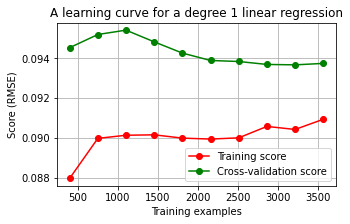

In [10]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a degree 1 linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### K cross validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250)

In [12]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression().fit(X_train, y_train)

score = cross_val_score(linreg, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

print('linear model original data intercept (b): {:.3f}'.format(linreg.intercept_))
print('linear model original data coeff (w): {}'.format(linreg.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

linear model original data intercept (b): 0.052
linear model original data coeff (w): [-7.32252201e-01  1.47271566e-03  2.23512548e+00  7.72742787e-01
 -2.06076155e-01 -7.79934236e-02  1.75300799e+00 -2.43958397e+00
 -3.93183002e-01  2.81043080e-01 -2.23089640e-01]
R-squared score (training): 0.747
R-squared score (test): 0.728
RMSE: 0.092


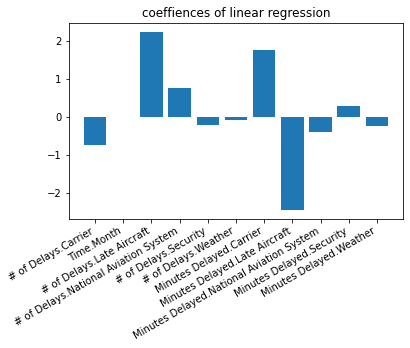

In [13]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linreg.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of linear regression")
fig.autofmt_xdate()